In [82]:
import matplotlib.pyplot as plt
import numpy as np
import pickle
import pandas as pd

### Opening MIP file

In [83]:
MIP_file = "./Run1_list.txt"

# The width of each column in the data text files
column_widths = [(0, 17), (18, 30), (31, 36), (37, 40), (41, 49), (50, 58)]

MIP_df = pd.read_fwf(MIP_file, colspecs=column_widths, skiprows=9, header=None, names=["Tstamp_us", "TrgID", "Brd","Ch", "LG", "HG"])
df["Tstamp_us"] = df["Tstamp_us"].fillna(method="ffill")
df["TrgID"] = df["TrgID"].fillna(method="ffill")

In [84]:
# Number of CAEN units = 6, each has 64 channels
CAEN_numbers = np.arange(3)
channel_numbers = np.arange(64)

#### Don't yet have the pedestal information but we'll set up a placeheolder pedestal dataframe for now

In [85]:
pedestal_example = {}
for CAEN in CAEN_numbers:
    for channel in channel_numbers:
        column_name = f"{CAEN}-{channel}"
        HG_mean, HG_sigma = 0, 0
        LG_mean, LG_sigma = 0, 0
        channel_dict = {
            "HG":{"m":HG_mean, "s":HG_sigma},
            "LG":{"m":LG_mean, "s":LG_sigma}
        }
        pedestal_example[column_name] = channel_dict
pedestal_df = pd.DataFrame(pedestal_example)

In [86]:
pedestal_df

,0-0,0-1,0-2,0-3,0-4,0-5,0-6,0-7,0-8,0-9,...,2-54,2-55,2-56,2-57,2-58,2-59,2-60,2-61,2-62,2-63
HG,"{'m': 0, 's': 0}","{'m': 0, 's': 0}","{'m': 0, 's': 0}","{'m': 0, 's': 0}","{'m': 0, 's': 0}","{'m': 0, 's': 0}","{'m': 0, 's': 0}","{'m': 0, 's': 0}","{'m': 0, 's': 0}","{'m': 0, 's': 0}",...,"{'m': 0, 's': 0}","{'m': 0, 's': 0}","{'m': 0, 's': 0}","{'m': 0, 's': 0}","{'m': 0, 's': 0}","{'m': 0, 's': 0}","{'m': 0, 's': 0}","{'m': 0, 's': 0}","{'m': 0, 's': 0}","{'m': 0, 's': 0}"
LG,"{'m': 0, 's': 0}","{'m': 0, 's': 0}","{'m': 0, 's': 0}","{'m': 0, 's': 0}","{'m': 0, 's': 0}","{'m': 0, 's': 0}","{'m': 0, 's': 0}","{'m': 0, 's': 0}","{'m': 0, 's': 0}","{'m': 0, 's': 0}",...,"{'m': 0, 's': 0}","{'m': 0, 's': 0}","{'m': 0, 's': 0}","{'m': 0, 's': 0}","{'m': 0, 's': 0}","{'m': 0, 's': 0}","{'m': 0, 's': 0}","{'m': 0, 's': 0}","{'m': 0, 's': 0}","{'m': 0, 's': 0}"


In [87]:
# Can access the entries as df["CAEN#-Channel#"]["HG"/"LG"]["m"/"s"] 
# HG = High gain, LG = low gain
# m = mean, s = sigm
pedestal_df["1-1"]["HG"]["m"]

0

In [123]:
def plot_CAEN_MIPs(MIP_df, pedestal_df, CAEN_number, channel_numbers):
    num_columns, num_rows = 8, 8
    fig, axes = plt.subplots(num_rows, num_columns, figsize=(30, 30), sharey=True, sharex=True)
    axes = axes.flatten()
    
    CAEN_mask = MIP_df["Brd"]==CAEN_number
    HG_MIPs = MIP_df["HG"][CAEN_mask]

    for channel in channel_numbers:
        channel_mask = MIP_df["Ch"][CAEN_mask]==channel
        HG_MIPs_for_channel = HG_MIPs[channel_mask]

        pedestal_mean = pedestal_df[f"{CAEN_number}-{channel}"]["HG"]["m"]
        pedestal_sigma = pedestal_df[f"{CAEN_number}-{channel}"]["HG"]["s"]
        counts, bin_edges = np.histogram(HG_MIPs_for_channel - pedestal_mean, bins=50)
        bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
        axes[channel].scatter(bin_centers, counts)
        axes[channel].set_title(f"CAEN {CAEN_number}, Ch {channel}")
        axes[channel].set_xlabel("ADCs")

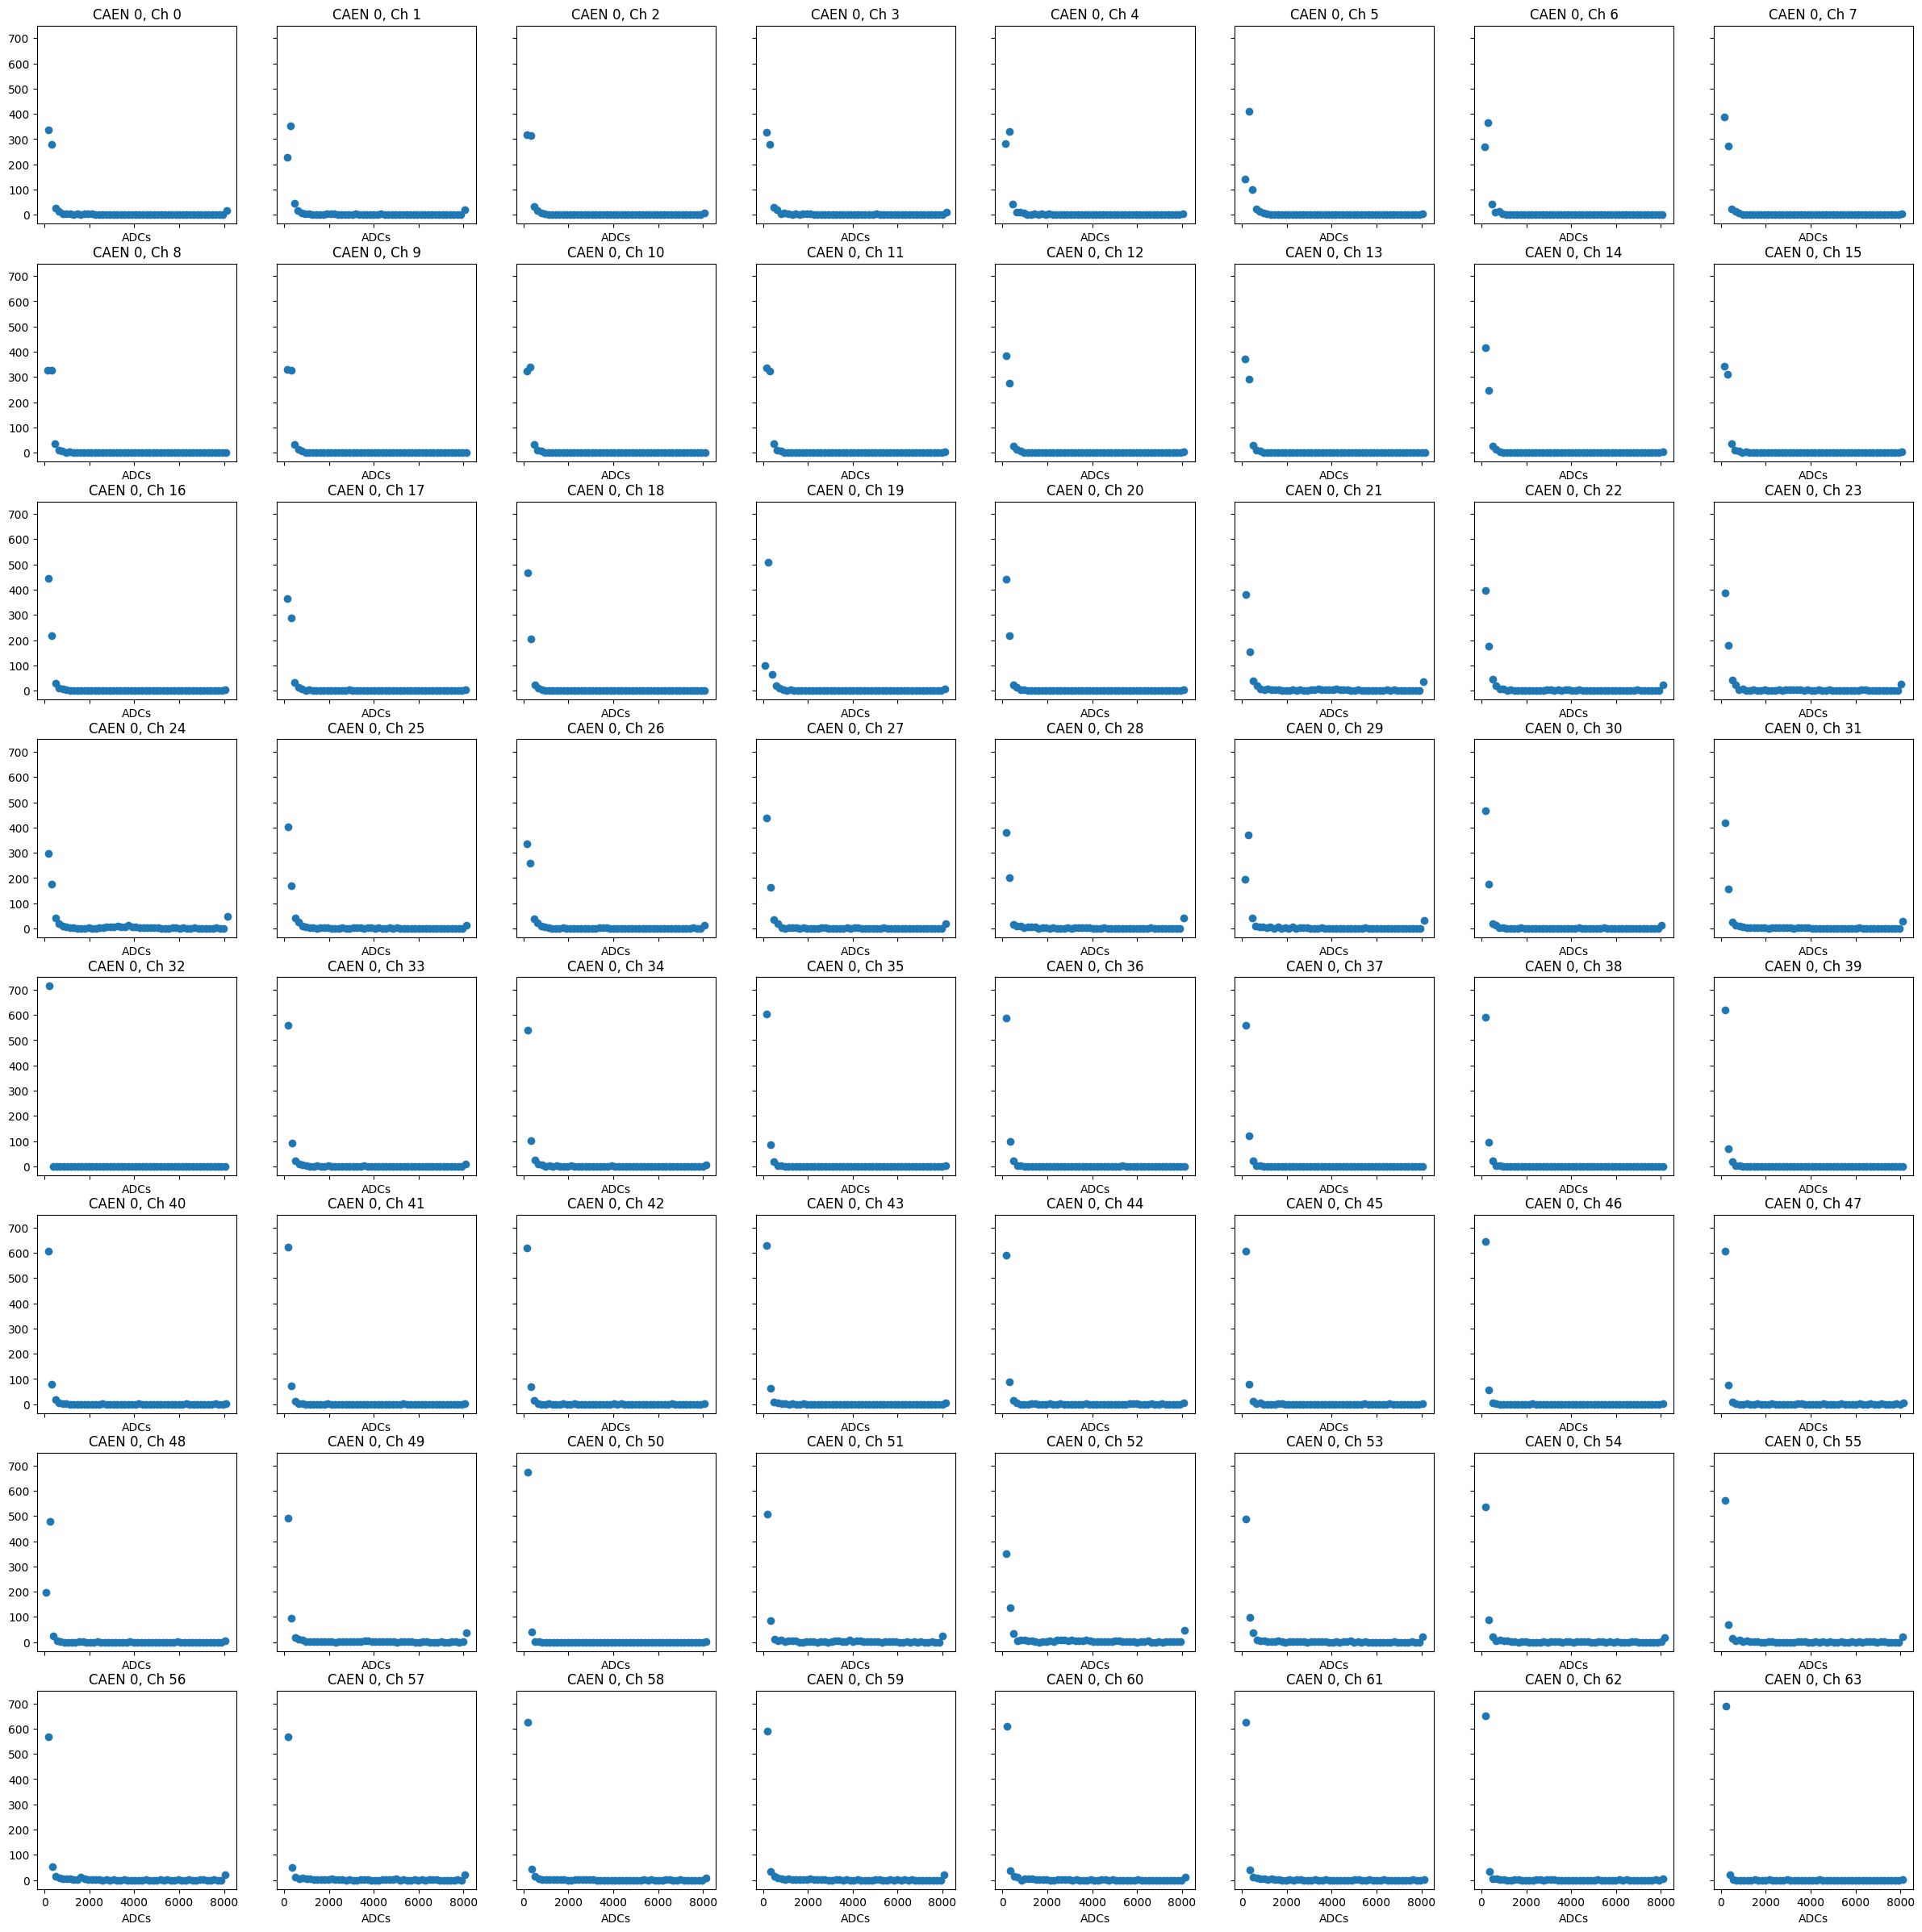

In [124]:
plot_CAEN_MIPs(MIP_df, pedestal_df, 0, channel_numbers)